In [60]:
from Groups import *

### Usage

In [61]:
G = DihegralGroup(3)

In [62]:
G

Group(e,r^1,r^2,s,sr^1,sr^2)

In [63]:
x = G.Element(1)
y = G.Element(2)
x,y,x*y

(r^1, r^2, e)

In [64]:
R = G.R
R

    	   e	r^1	r^2	s	sr^1	sr^2	
    	   -	---	---	-	----	----	
e	|  e	r^1	r^2	s	sr^1	sr^2	
r^1	|  r^1	r^2	e	sr^2	s	sr^1	
r^2	|  r^2	e	r^1	sr^1	sr^2	s	
s	|  s	sr^1	sr^2	e	r^1	r^2	
sr^1	|  sr^1	sr^2	s	r^2	e	r^1	
sr^2	|  sr^2	s	sr^1	r^1	r^2	e	

In [65]:
R.T # The Calley table

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 0, 5, 3, 4],
       [2, 0, 1, 4, 5, 3],
       [3, 4, 5, 0, 1, 2],
       [4, 5, 3, 2, 0, 1],
       [5, 3, 4, 1, 2, 0]], dtype=int32)

In [66]:
R.Elements # The elements that the Relation is operating over

['e', 'r^1', 'r^2', 's', 'sr^1', 'sr^2']

In [67]:
H = R.generate([1])
H

Group(e,r^1,r^2)

In [68]:
C = Coset(H,2)
C

(r^2 * Group(e,r^1,r^2))

In [69]:
[R[i] for i in C.expand()]

['r^2', 'e', 'r^1']

In [70]:
G.Cosets(H)

[(e * Group(e,r^1,r^2)), (s * Group(e,r^1,r^2))]

In [71]:
N = G.MinimumNormalSubGroup()
N

Group(e,r^1,r^2)

In [72]:
G/N

Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))

In [73]:
gen = G.MinimumGeneratingSet(True)
gen

Finding minimum generating set for :
 Group(e,r^1,r^2,s,sr^1,sr^2)
N :
 Group(e,r^1,r^2)
n :
 [1]
G/N :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
Finding minimum generating set for :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
N :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
g :
 [3]
N is abelian.


[3, 1]

In [74]:
G_g = R.generate(gen)
G_g

Group(e,r^1,r^2,s,sr^1,sr^2)

### Complexity Analysis

In [75]:
from matplotlib.pyplot import plot,xlabel,ylabel,title,legend
from time import time

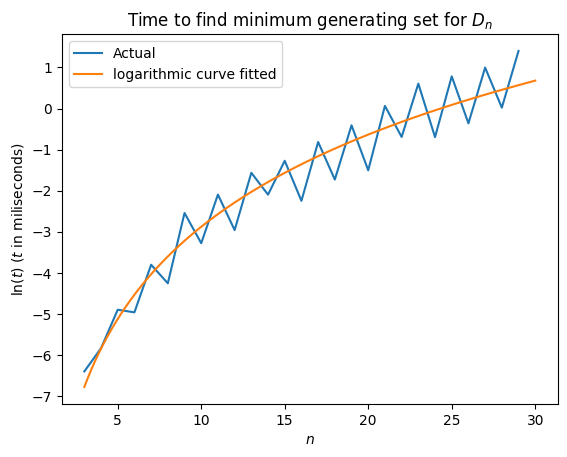

In [83]:
L = []
iterations = 5
N = 30
for n in range(3,N):
    G = DihegralGroup(n)
    to = time()
    for _ in range(iterations):
        g = G.MinimumGeneratingSet()
        Gg = G.R.generate(g)
        if not G == Gg:
            print("oof")
            break
    L.append((time()-to)/10)
L = log(array(L))
plot(range(3,N),L)

# Curve fitting
t = arange(3,N)
Lt = log(t)
X = array([[lt,1] for lt in Lt])
XT = X.T
XTX = X.T @ X
XTXi = linalg.inv(XTX)
pseudo_inverse = XTXi @ XT
theta = dot(pseudo_inverse,L)
a,b = theta
t = linspace(3,N,1000)
Lt = log(t)
L_pred = Lt*a + b
plot(t,L_pred)

xlabel("$ n $")
ylabel("$\ln(t)$ ($ t $ in miliseconds)")
title("Time to find minimum generating set for $ D_n $")
legend(["Actual","logarithmic curve fitted"])